<a href="https://colab.research.google.com/github/pinigabai/DS/blob/master/ML%20Project%20-%20Pini%20Gabai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Background & Motivation

Mental health challenges among students, particularly depression, have become a significant concern globally. Factors such as academic pressure, lifestyle choices, and social influences contribute to the prevalence of depression in this demographic. Early detection and understanding of these factors are crucial for implementing effective interventions.

## Dataset Overview

The [Student Depression Dataset](https://www.kaggle.com/datasets/hopesb/student-depression-dataset) from Kaggle provides insights into various factors affecting student mental health. The dataset comprises 27,901 records with 18 attributes, including demographics, academic performance, lifestyle habits, and mental health indicators.

## Objectives

*   **Understand the dataset:** Explore the structure, types, and distributions of the data.
*   **Preprocess the data:** Handle missing values, encode categorical features, and scale numerical features.
*   **Analyze relationships:** Identify correlations between different features and depression status.
*   **Build predictive models:** Develop machine learning models to predict depression status based on the available features.
*   **Evaluate model performance:** Assess the models using appropriate metrics.

# Library Imports & Data Loading

In [1]:
from io import StringIO
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/student_depression.csv')
df.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts', 'Family History of Mental Illness': 'Family Mental Illness History'}, inplace=True)

# EDA & Preprocessing

In [3]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental Illness History,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal Thoughts,Work/Study Hours,Financial Stress,Family Mental Illness History,Depression
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1
27900,140699,Male,27.0,Patna,Student,4.0,0.0,9.24,1.0,0.0,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


## Dimensions and Data Types

In [5]:
df.shape

(27901, 18)

There are 27,901 rows and 18 columns.

In [6]:
buffer = StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()
lines = info_str.splitlines()
data_lines = [line for line in lines if line.strip().startswith('0') or line.strip()[0].isdigit()]
column_data = []
for line in data_lines:
  parts = line.strip().split()
  if len(parts) >= 4:
    index = parts[0]
    dtype = parts[-1]
    non_null = parts[-3].replace(',', '')
    column_name = ' '.join(parts[1:-3])
    column_data.append((column_name, int(non_null), dtype))
pd.DataFrame(column_data, columns=['Column', 'Non-Null Count', 'Dtype'])

,Column,Non-Null Count,Dtype
0,id,27901,int64
1,Gender,27901,object
2,Age,27901,float64
3,City,27901,object
4,Profession,27901,object
5,Academic Pressure,27901,float64
6,Work Pressure,27901,float64
7,CGPA,27901,float64
8,Study Satisfaction,27901,float64
9,Job Satisfaction,27901,float64


There are eight categorical columns and ten numeric columns.

## Prevalence

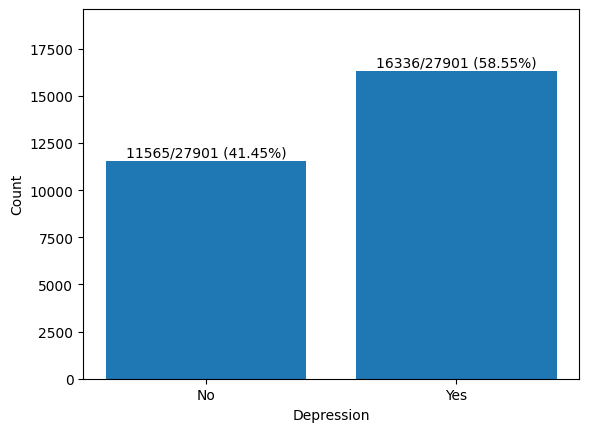

In [7]:
counts = df['Depression'].value_counts().sort_index()
total = counts.sum()
ratios = counts / total

plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Depression')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

for i, (count, ratio) in enumerate(zip(counts.values, ratios.values)):
  plt.text(i, count + 200, f'{count}/{total} ({ratio:.2%})', ha='center', fontsize=10)

plt.ylim(0, max(counts.values) * 1.2)
plt.show()

## Unique and Missing Values

In [8]:
df.nunique().rename('Unique Values')

,Unique Values
id,27901
Gender,2
Age,34
City,52
Profession,14
Academic Pressure,6
Work Pressure,3
CGPA,332
Study Satisfaction,6
Job Satisfaction,5


The `City` column has the highest cardinality among the categorical columns, containing 52 unique city names.

In [9]:
df.isnull().sum().rename('Missing Values')

,Missing Values
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


The dataset contains only three missing values in the `Financial Stress` column. It would be reasonable to drop them:

In [10]:
df.dropna(inplace=True)

The `id` column can be removed from the dataset as it's a unique identifier and doesn't contribute meaningful information for predicting student depression:

In [11]:
df.drop('id', axis=1, inplace=True)

## Statistics Analysis

### Univariate Analysis - Numeric Features

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,27898.0,25.822174,4.905651,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27898.0,3.141336,1.381462,0.0,2.00,3.00,4.00,5.0
Work Pressure,27898.0,0.000430,0.043994,0.0,0.00,0.00,0.00,5.0
CGPA,27898.0,7.656160,1.470708,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27898.0,2.943974,1.361122,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27898.0,0.000681,0.044397,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27898.0,7.156570,3.707598,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27898.0,0.585526,0.492640,0.0,0.00,1.00,1.00,1.0


In [13]:
numeric_features = df.select_dtypes(include='float64')
kurtosis = numeric_features.apply(lambda x: stats.kurtosis(x, fisher=True, bias=False, nan_policy='omit'))
skewness = numeric_features.apply(lambda x: stats.skew(x, nan_policy='omit'))
pd.DataFrame({'Kurtosis': kurtosis, 'Skewness': skewness})

,Kurtosis,Skewness
Age,-0.846064,0.132305
Academic Pressure,-1.161136,-0.135285
Work Pressure,12109.333724,108.582683
CGPA,-1.023071,-0.113108
Study Satisfaction,-1.223129,0.010330
Job Satisfaction,5926.359702,74.097693
Work/Study Hours,-0.999722,-0.454639
Financial Stress,-1.324691,-0.130297


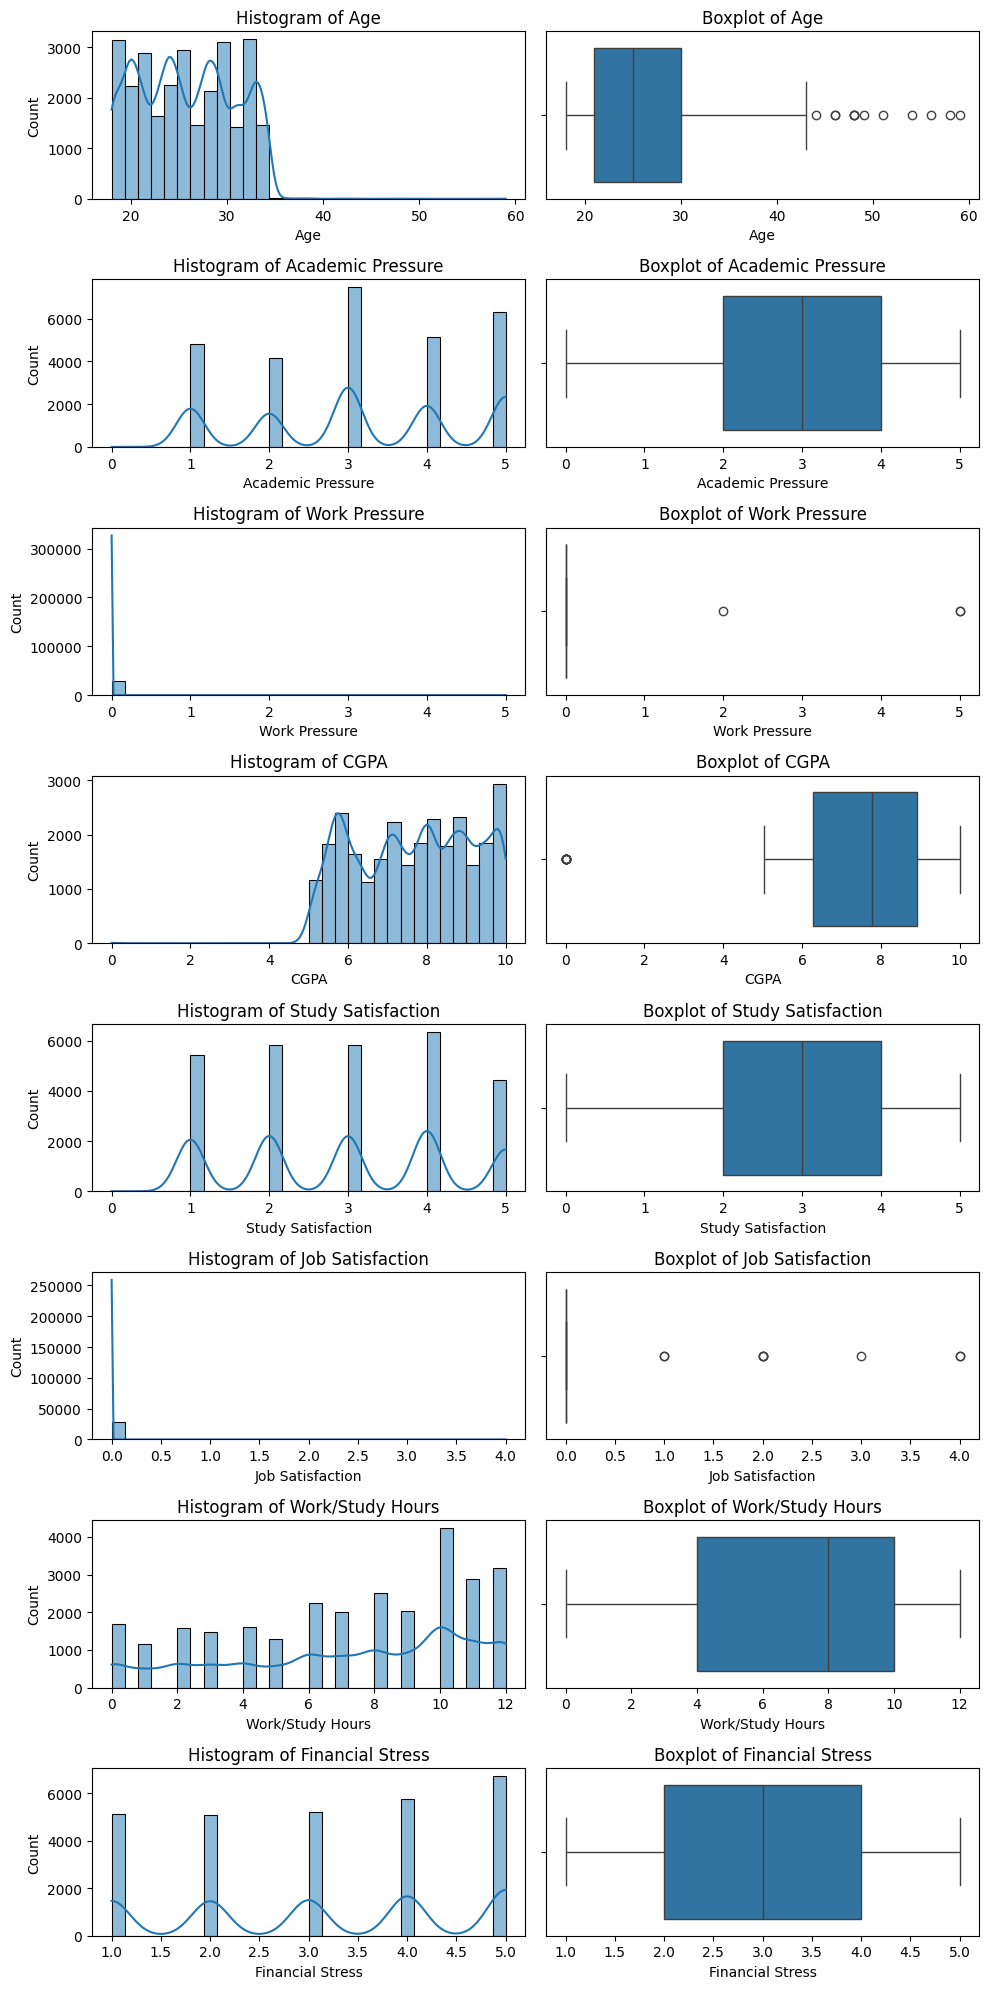

In [14]:
numeric_features = df.select_dtypes(include='float64')
fig, axes = plt.subplots(8, 2, figsize=(10, 20))
axes = axes.flatten()
for i, feature in enumerate(numeric_features.columns):
  sns.histplot(numeric_features[feature], bins=30, kde=True, ax=axes[i * 2])
  axes[i * 2].set_title(f'Histogram of {feature}')
  sns.boxplot(x=df[feature], ax=axes[i * 2 + 1])
  axes[i * 2 + 1].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#### Outlier Detection Using the Z-Score Method

In [15]:
numeric_features = df.select_dtypes(include='float64')
z_scores = numeric_features.apply(stats.zscore)
outliers = (z_scores.abs() > 3)
outliers.sum().to_frame('Outliers Count')

,Outliers Count
Age,19
Academic Pressure,0
Work Pressure,3
CGPA,9
Study Satisfaction,0
Job Satisfaction,8
Work/Study Hours,0
Financial Stress,0


**Notable Findings:**
*   `Age` is mostly concentrated between 18 and 30, with some outliers reaching up to nearly 60 years.
*   `Work Pressure` and `Job Satisfaction` are highly skewed, with the vast majority reporting very low values and a few outliers at the high end.
*   `CGPA` follows a relatively normal distribution centered around 7-8, with a few outliers on both extremes.
*   `Academic Pressure`, `Study Satisfaction`, and `Financial Stress` show multimodal or discrete distributions, likely reflecting categorical survey responses (1-5 scale).
*   `Work/Study Hours` is right-skewed, with most individuals working/studying 5-10 hours and a few at the extremes.

The `Work Pressure` and `Job Satisfaction` features can be dropped, as their distributions are overwhelmingly dominated by the value 0, indicating they are unlikely to contribute meaningful predictive value:

In [16]:
df.drop(['Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

### Univariate Analysis - Categorical Features

In [17]:
categorical_features = df.select_dtypes(include='object').columns
count = 0
for i in range(9):
  if count < len(categorical_features):
    feature = categorical_features[count]
    print(f'Frequency Table for {feature}:')
    abs_freq = df[feature].value_counts()
    rel_freq = df[feature].value_counts(normalize=True)
    display(pd.DataFrame({'Absolute Frequency': abs_freq, 'Relative Frequency': rel_freq}))
    print('-' * 50)
    count += 1

Frequency Table for Gender:


,Absolute Frequency,Relative Frequency
Gender,,
Male,15546,0.557244
Female,12352,0.442756


--------------------------------------------------
Frequency Table for City:


,Absolute Frequency,Relative Frequency
City,,
Kalyan,1570,0.056276
Srinagar,1372,0.049179
Hyderabad,1339,0.047996
Vasai-Virar,1290,0.046240
Lucknow,1155,0.041401
Thane,1139,0.040827
Ludhiana,1111,0.039824
Agra,1094,0.039214
Surat,1078,0.038641


--------------------------------------------------
Frequency Table for Profession:


,Absolute Frequency,Relative Frequency
Profession,,
Student,27867,0.998889
Architect,8,0.000287
Teacher,6,0.000215
Digital Marketer,3,0.000108
Chef,2,0.000072
Content Writer,2,0.000072
Pharmacist,2,0.000072
Doctor,2,0.000072
UX/UI Designer,1,0.000036


--------------------------------------------------
Frequency Table for Sleep Duration:


,Absolute Frequency,Relative Frequency
Sleep Duration,,
Less than 5 hours,8309,0.297835
7-8 hours,7346,0.263316
5-6 hours,6181,0.221557
More than 8 hours,6044,0.216646
Others,18,0.000645


--------------------------------------------------
Frequency Table for Dietary Habits:


,Absolute Frequency,Relative Frequency
Dietary Habits,,
Unhealthy,10316,0.369776
Moderate,9921,0.355617
Healthy,7649,0.274177
Others,12,0.000430


--------------------------------------------------
Frequency Table for Degree:


,Absolute Frequency,Relative Frequency
Degree,,
Class 12,6080,0.217937
B.Ed,1866,0.066887
B.Com,1506,0.053982
B.Arch,1478,0.052979
BCA,1432,0.051330
MSc,1190,0.042655
B.Tech,1152,0.041293
MCA,1044,0.037422
M.Tech,1022,0.036633


--------------------------------------------------
Frequency Table for Suicidal Thoughts:


,Absolute Frequency,Relative Frequency
Suicidal Thoughts,,
Yes,17656,0.632877
No,10242,0.367123


--------------------------------------------------
Frequency Table for Family Mental Illness History:


,Absolute Frequency,Relative Frequency
Family Mental Illness History,,
No,14397,0.516058
Yes,13501,0.483942


--------------------------------------------------


The `Profession` feature is overwhelmingly dominated by the **Student** level (99.89%) and provides little to no predictive value, so it can be safely dropped from the model:

In [18]:
df.drop('Profession', axis=1, inplace=True)

Out of the 52 cities, 22 have a frequency of only one or two (whereas the others have over 400) and can therefore be dropped:

In [19]:
cities_frequency = df['City'].value_counts()
infrequent_cities = cities_frequency[cities_frequency <= 2].index
df.drop(df[df['City'].isin(infrequent_cities)].index, inplace=True)

Since the **Others** level appears infrequently and isn't necessary for encoding ordinal features, rows with this level can be dropped:

In [20]:
df.drop(df[df.apply(lambda row: any('Others' in str(cell) for cell in row), axis=1)].index, inplace=True)

In summary, 94 rows, representing approximately 0.34% of the total data, were dropped.

Generating a new feature by grouping the levels of the `Degree` feature into broader categories:

In [21]:
degree_map = {
    'Class 12': 'School-Level',
    'BSc': 'Bachelor',
    'BA': 'Bachelor',
    'B.Com': 'Bachelor',
    'BBA': 'Bachelor',
    'BE': 'Bachelor',
    'B.Tech': 'Bachelor',
    'BCA': 'Bachelor',
    'B.Pharm': 'Bachelor',
    'B.Ed': 'Bachelor',
    'BHM': 'Bachelor',
    'B.Arch': 'Bachelor',
    'LLB': 'Bachelor',
    'MSc': 'Master',
    'MA': 'Master',
    'M.Com': 'Master',
    'MBA': 'Master',
    'MCA': 'Master',
    'M.Tech': 'Master',
    'ME': 'Master',
    'M.Pharm': 'Master',
    'M.Ed': 'Master',
    'MHM': 'Master',
    'LLM': 'Master',
    'PhD': 'Doctorate',
    'MBBS': 'Medicine',
    'MD': 'Medicine'
}

df['Degree Group'] = df['Degree'].map(degree_map)
df.drop('Degree', axis=1, inplace=True)

### Bivariate Analysis

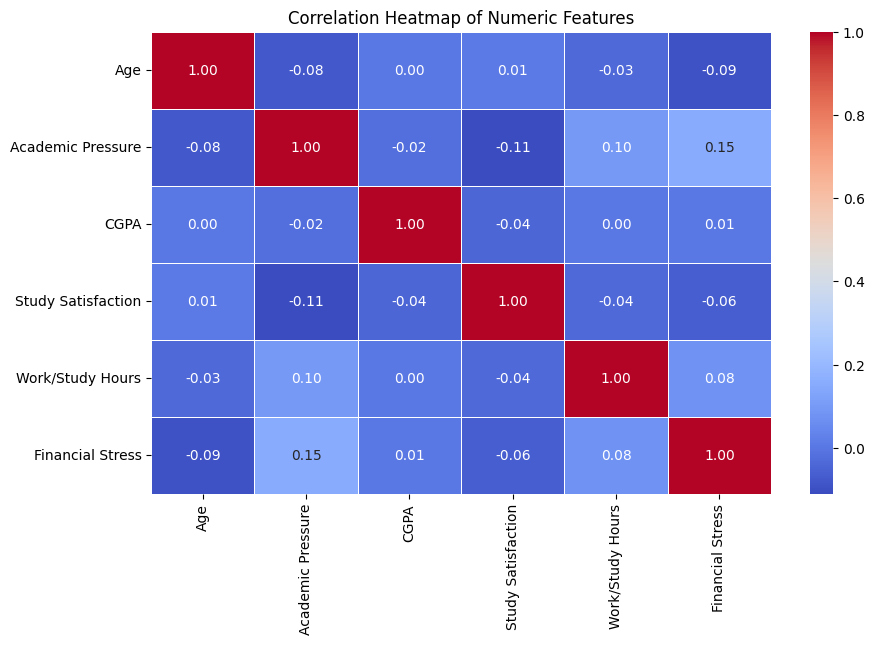

In [22]:
corr_matrix = df.select_dtypes(include='float64').corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

The correlation matrix shows generally weak relationships among the numeric features. The strongest (though still weak) positive correlation is between `Academic Pressure` and `Financial Stress` (0.15), suggesting a slight link between feeling pressured academically and experiencing financial stress.

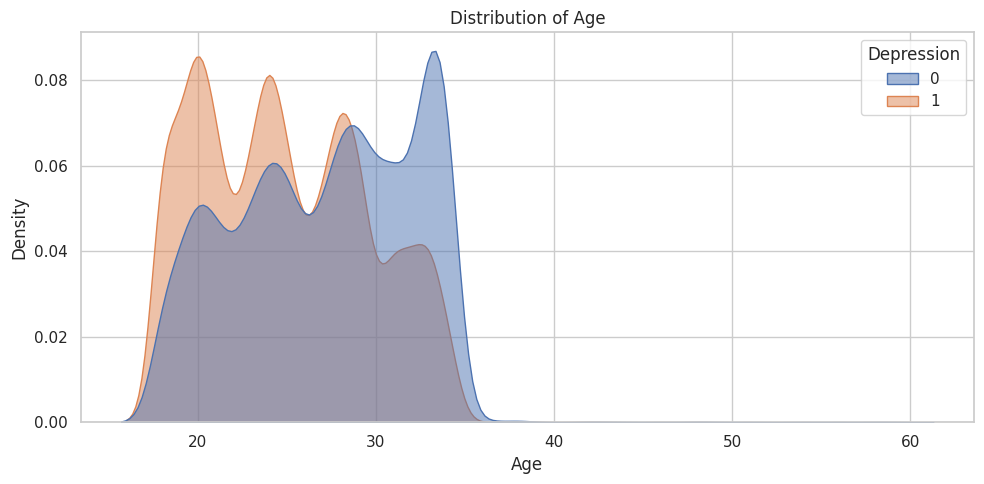

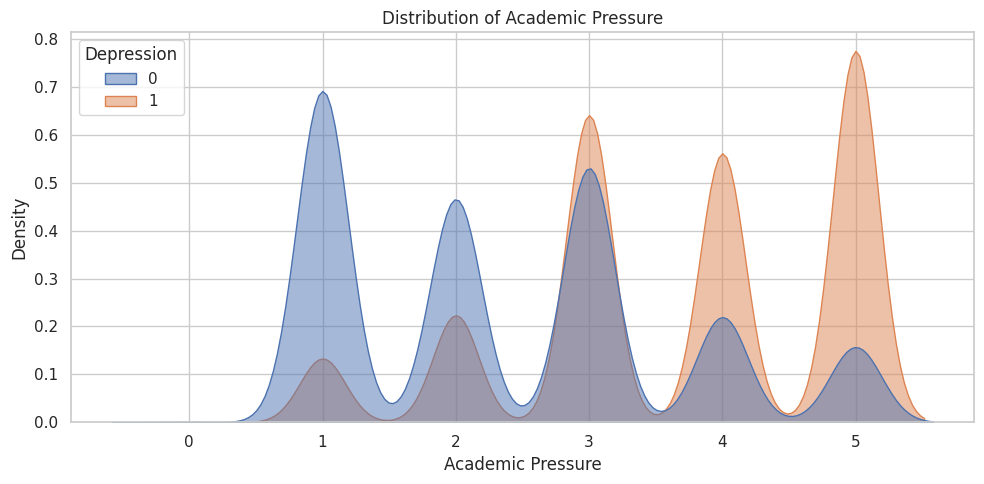

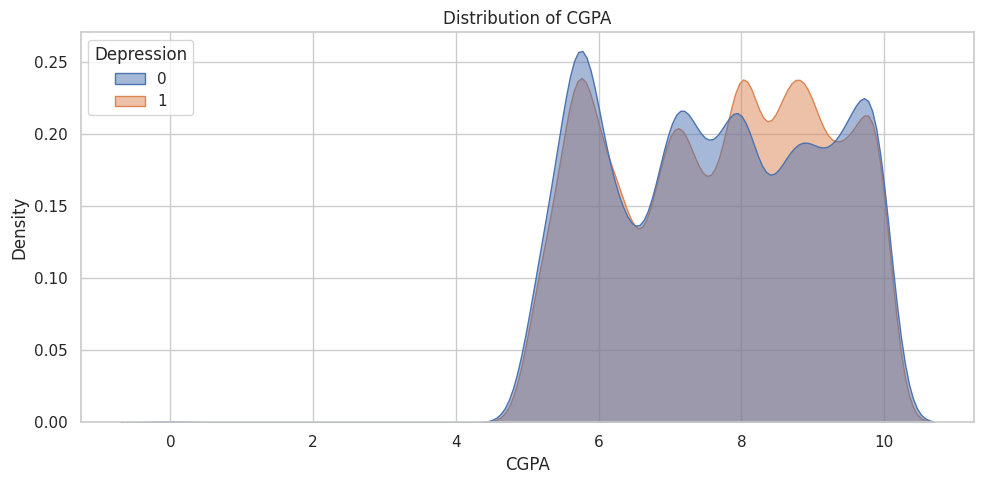

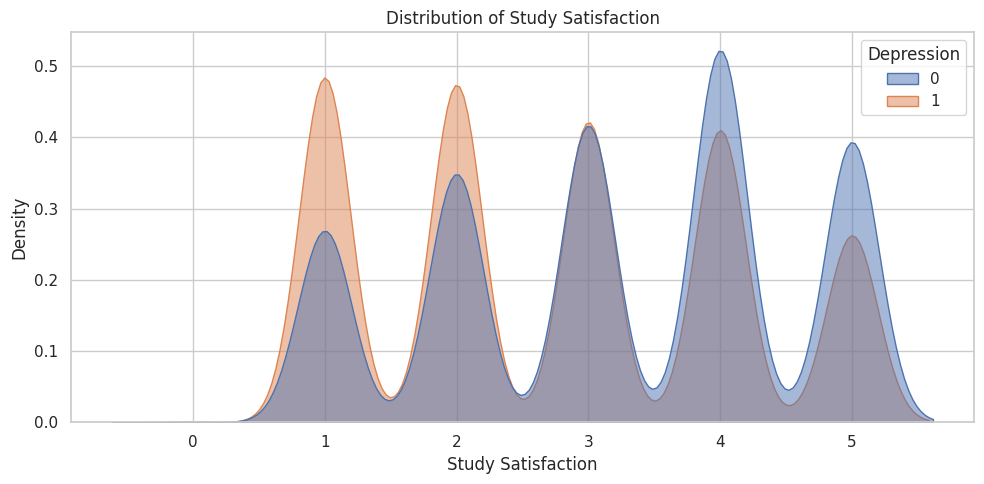

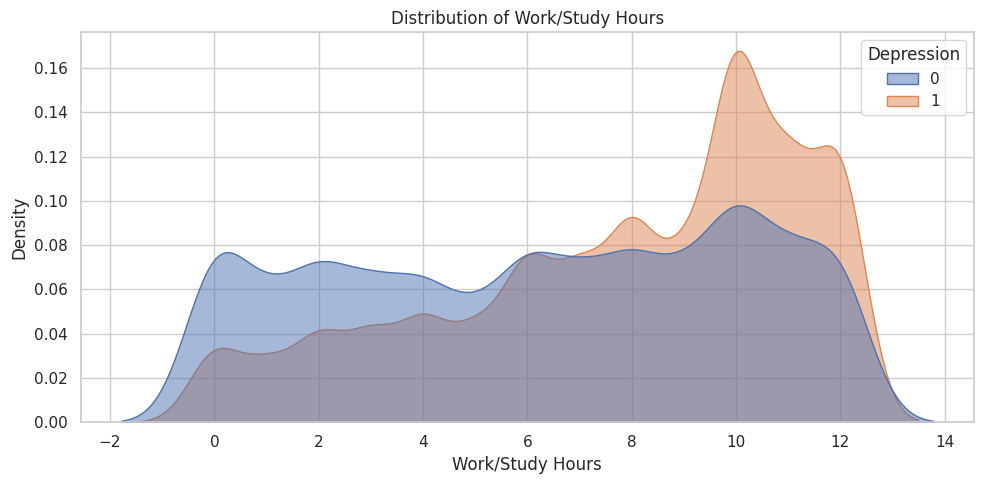

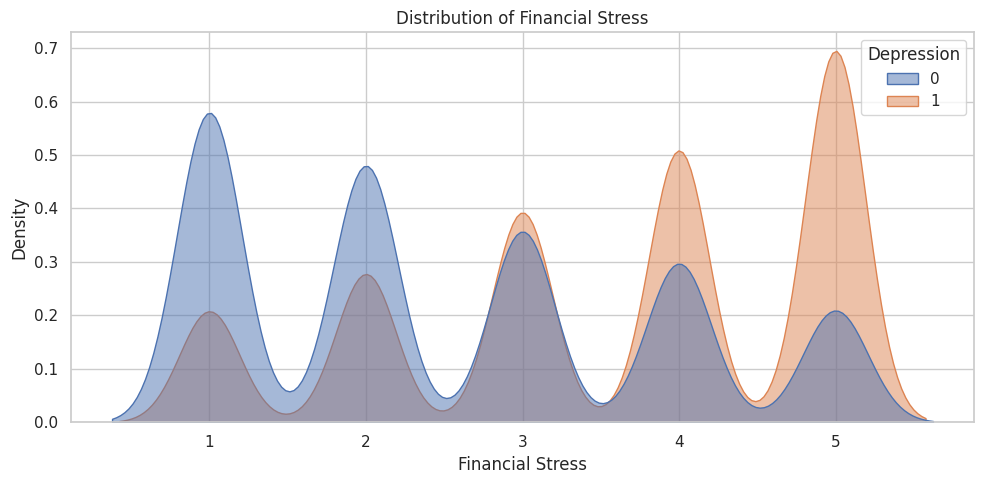

In [23]:
sns.set(style='whitegrid')
for feature in df.select_dtypes(include='float64').columns:
  plt.figure(figsize=(10, 5))
  sns.kdeplot(data=df, x=feature, hue='Depression', fill=True, common_norm=False, alpha=0.5)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Density')
  plt.tight_layout()
  plt.show()

#### Numeric Features vs. Binary Target (Mann-Whitney U Test)

In [24]:
mw_test_results = []

for feature in df.select_dtypes(include='float64').columns:
  _, p_value = stats.mannwhitneyu(df[df['Depression'] == 0][feature], df[df['Depression'] == 1][feature], alternative='two-sided')
  mw_test_results.append({'Feature': feature, 'P-Value': p_value})

mw_test_results = pd.DataFrame(mw_test_results).sort_values(by='P-Value', ascending=False).reset_index(drop=True)
mw_test_results['P-Value'] = mw_test_results['P-Value'].apply(lambda x: format(x, '.4f'))
mw_test_results

,Feature,P-Value
0,CGPA,0.0005
1,Study Satisfaction,0.0000
2,Work/Study Hours,0.0000
3,Age,0.0000
4,Academic Pressure,0.0000
5,Financial Stress,0.0000


All listed numeric features show a statistically significant difference (p-value < 0.05) between the target groups, suggesting they are likely associated with the target variable.

#### Categorical Features vs. Binary Target (Chi-Square Test of Independence)

In [25]:
chi2_test_results = []

for feature in df.select_dtypes(include='object').columns:
  _, p_value, _, _ = stats.chi2_contingency(pd.crosstab(df[feature], df['Depression']))
  chi2_test_results.append({'Feature': feature, 'P-Value': p_value})

chi2_test_results = pd.DataFrame(chi2_test_results).sort_values(by='P-Value', ascending=False).reset_index(drop=True)
chi2_test_results['P-Value'] = chi2_test_results['P-Value'].apply(lambda x: format(x, '.4f'))
chi2_test_results

,Feature,P-Value
0,Gender,0.8058
1,Family Mental Illness History,0.0000
2,City,0.0000
3,Sleep Duration,0.0000
4,Degree Group,0.0000
5,Dietary Habits,0.0000
6,Suicidal Thoughts,0.0000


All listed categorical features except `Gender` have a statistically significant association with the target variable (p-value < 0.05), suggesting they may be important predictors.

## Train/Test Splitting

In [26]:
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Encoding

In [27]:
nominal_features = ['Gender', 'City', 'Dietary Habits', 'Suicidal Thoughts', 'Family Mental Illness History']
ordinal_features = ['Sleep Duration', 'Degree Group']
sleep_duration_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']
degree_group_order = ['School-Level', 'Bachelor', 'Medicine', 'Master', 'Doctorate']

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

encoded_sex_train = one_hot_encoder.fit_transform(X_train[nominal_features])
encoded_sex_train = pd.DataFrame(encoded_sex_train, columns=one_hot_encoder.get_feature_names_out(nominal_features), index=X_train.index)
X_train = pd.concat([X_train.drop(nominal_features, axis=1), encoded_sex_train], axis=1)

encoded_sex_test = one_hot_encoder.transform(X_test[nominal_features])
encoded_sex_test = pd.DataFrame(encoded_sex_test, columns=one_hot_encoder.get_feature_names_out(nominal_features), index=X_test.index)
X_test = pd.concat([X_test.drop(nominal_features, axis=1), encoded_sex_test], axis=1)

ordinal_encoder = OrdinalEncoder(categories=[sleep_duration_order, degree_group_order])

encoded_age_train = ordinal_encoder.fit_transform(X_train[ordinal_features])
encoded_age_train = pd.DataFrame(encoded_age_train, columns=ordinal_encoder.get_feature_names_out(ordinal_features), index=X_train.index)
X_train = pd.concat([X_train.drop(ordinal_features, axis=1), encoded_age_train], axis=1)

encoded_age_test = ordinal_encoder.transform(X_test[ordinal_features])
encoded_age_test = pd.DataFrame(encoded_age_test, columns=ordinal_encoder.get_feature_names_out(ordinal_features), index=X_test.index)
X_test = pd.concat([X_test.drop(ordinal_features, axis=1), encoded_age_test], axis=1)

## Scaling

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling & Evaluation

## Baseline Model


Confusion Matrix of the Baseline Model:



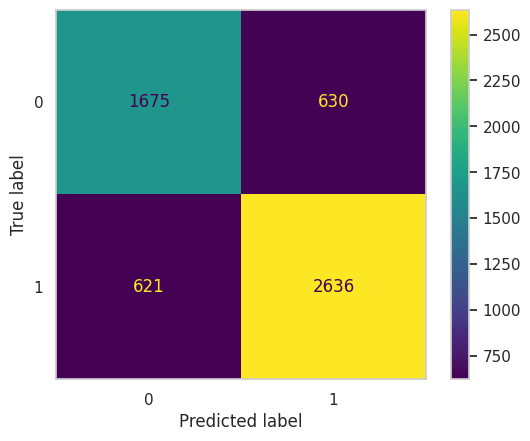

In [29]:
baseline = DecisionTreeClassifier(random_state=42)
baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)
mcc_baseline = matthews_corrcoef(y_test, y_pred_baseline)

scores_baseline = [accuracy_baseline, recall_baseline, precision_baseline, f1_baseline, mcc_baseline]

print('\nConfusion Matrix of the Baseline Model:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_baseline)
ax = plt.gca()
ax.grid(False)
plt.show()

## Decision Tree

### Hyperparameter Tuning Using K-Fold Cross-Validation

In [30]:
max_depth_list = [3, 5, 10, None]
min_samples_split_list = [2, 5, 10]
results_hpt_dt = []

for max_depth in max_depth_list:
  for min_samples_split in min_samples_split_list:
    dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
    mean_f1 = np.mean(cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='f1'))
    results_hpt_dt.append({'max_depth': max_depth, 'min_samples_split': min_samples_split, 'F1-Score': mean_f1})

results_hpt_dt = pd.DataFrame(results_hpt_dt).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
results_hpt_dt

,max_depth,min_samples_split,F1-Score
0,3.0,2,0.853733
1,3.0,5,0.853733
2,3.0,10,0.853733
3,5.0,2,0.849885
4,5.0,5,0.849885
5,5.0,10,0.849885
6,10.0,10,0.843230
7,10.0,2,0.842119
8,10.0,5,0.841088
9,NaN,10,0.812162


### Final Model Evaluation


Confusion Matrix of the Decision Tree:



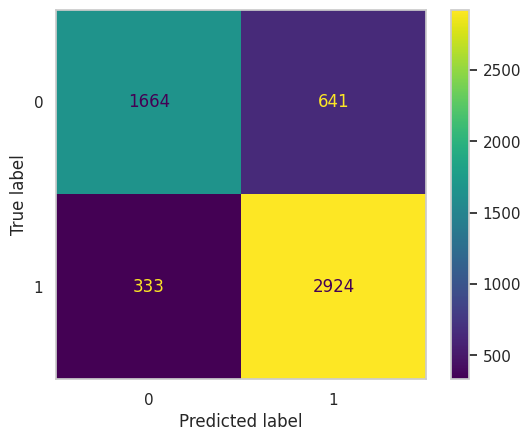

In [31]:
best_max_depth_dt = results_hpt_dt.loc[0, 'max_depth']

final_dt = DecisionTreeClassifier(max_depth=(None if pd.isna(best_max_depth_dt) else int(best_max_depth_dt)), min_samples_split=results_hpt_dt.loc[0, 'min_samples_split'], random_state=42)
final_dt.fit(X_train_scaled, y_train)
y_pred_final_dt = final_dt.predict(X_test_scaled)

accuracy_final_dt = accuracy_score(y_test, y_pred_final_dt)
recall_final_dt = recall_score(y_test, y_pred_final_dt)
precision_final_dt = precision_score(y_test, y_pred_final_dt)
f1_final_dt = f1_score(y_test, y_pred_final_dt)
mcc_final_dt = matthews_corrcoef(y_test, y_pred_final_dt)

scores_final_dt = [accuracy_final_dt, recall_final_dt, precision_final_dt, f1_final_dt, mcc_final_dt]

print('\nConfusion Matrix of the Decision Tree:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final_dt)
ax = plt.gca()
ax.grid(False)
plt.show()

### Tree Visualization

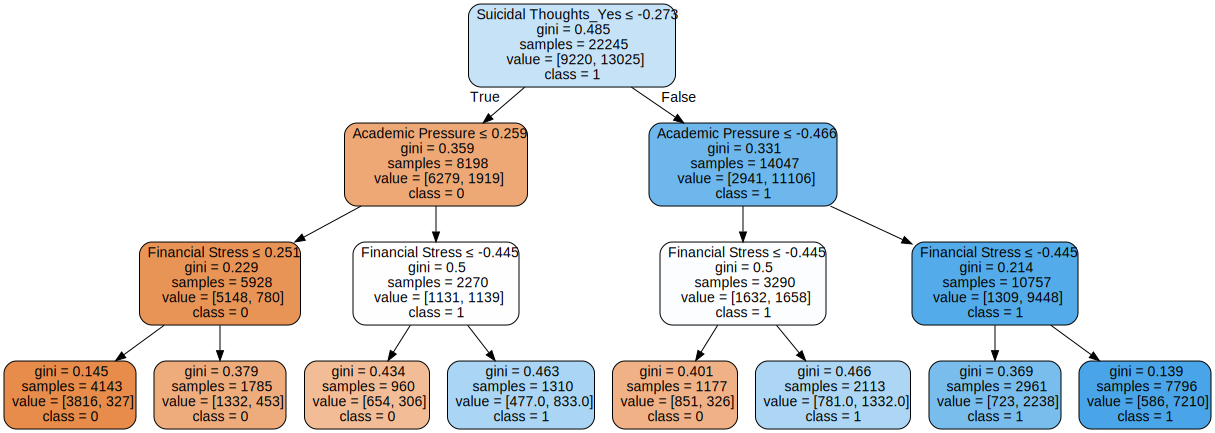

In [32]:
dot_data = tree.export_graphviz(final_dt, out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)

The most important factor in predicting depression is `Suicidal Thoughts` - individuals with higher levels are far more likely to be classified as depressed. Among those with lower `Suicidal Thoughts`, `Academic Pressure` and `Financial Stress` help further split individuals, mostly identifying those not depressed. On the other hand, among those with high `Suicidal Thoughts`, low `Financial Stress` strongly predicts no depression, while high `Financial Stress` with high `Academic Pressure` increases the likelihood of depression.

## Logistic Regression

### Hyperparameter Tuning Using K-Fold Cross-Validation

In [33]:
eta0_list = [0.001, 0.01, 0.1, 1.0]
learning_rate_list = ['constant', 'optimal', 'adaptive']
results_hpt_sgd = []

for eta0 in eta0_list:
  for learning_rate in learning_rate_list:
    sgd = SGDClassifier(loss='log_loss', eta0=eta0, learning_rate=learning_rate, random_state=42)
    mean_f1 = np.mean(cross_val_score(sgd, X_train_scaled, y_train, cv=5, scoring='f1'))
    results_hpt_sgd.append({'eta0': eta0, 'learning_rate': learning_rate, 'F1-Score': mean_f1})

results_hpt_sgd = pd.DataFrame(results_hpt_sgd).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
results_hpt_sgd

,eta0,learning_rate,F1-Score
0,0.001,constant,0.872051
1,0.001,adaptive,0.871755
2,0.100,adaptive,0.871741
3,0.010,adaptive,0.871553
4,1.000,adaptive,0.871537
5,0.001,optimal,0.866069
6,1.000,optimal,0.866069
7,0.010,optimal,0.866069
8,0.100,optimal,0.866069
9,0.010,constant,0.865086


### Final Model Evaluation


Confusion Matrix of the Logistic Regression:



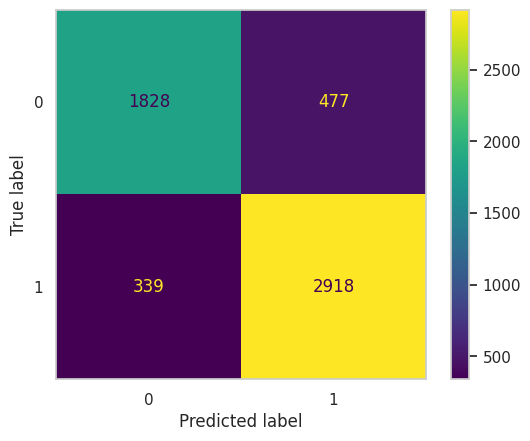

In [34]:
final_sgd = SGDClassifier(loss='log_loss', eta0=results_hpt_sgd.loc[0, 'eta0'], learning_rate=results_hpt_sgd.loc[0, 'learning_rate'], random_state=42)
final_sgd.fit(X_train_scaled, y_train)
y_pred_final_sgd = final_sgd.predict(X_test_scaled)

accuracy_final_sgd = accuracy_score(y_test, y_pred_final_sgd)
recall_final_sgd = recall_score(y_test, y_pred_final_sgd)
precision_final_sgd = precision_score(y_test, y_pred_final_sgd)
f1_final_sgd = f1_score(y_test, y_pred_final_sgd)
mcc_final_sgd = matthews_corrcoef(y_test, y_pred_final_sgd)

scores_final_sgd = [accuracy_final_sgd, recall_final_sgd, precision_final_sgd, f1_final_sgd, mcc_final_sgd]

print('\nConfusion Matrix of the Logistic Regression:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final_sgd)
ax = plt.gca()
ax.grid(False)
plt.show()

## Random Forest

### Hyperparameter Tuning Using K-Fold Cross-Validation

In [35]:
n_estimators_list = [50, 100, 200]
max_depth_list = [5, 10, None]
results_hpt_rf = []

for n_estimators in n_estimators_list:
  for max_depth in max_depth_list:
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    mean_f1 = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='f1'))
    results_hpt_rf.append({'n_estimators': n_estimators, 'max_depth': max_depth, 'F1-Score': mean_f1})

results_hpt_rf = pd.DataFrame(results_hpt_rf).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
results_hpt_rf

,n_estimators,max_depth,F1-Score
0,200,NaN,0.869708
1,100,10.0,0.869388
2,50,10.0,0.868169
3,200,10.0,0.868013
4,100,NaN,0.866984
5,50,NaN,0.866592
6,100,5.0,0.865280
7,200,5.0,0.863527
8,50,5.0,0.862145


### Final Model Evaluation


Confusion Matrix of the Random Forest:



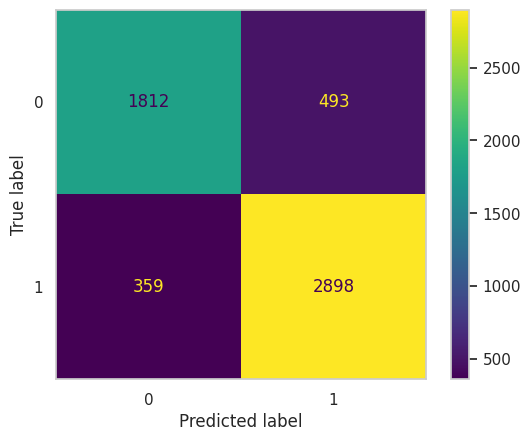

In [36]:
best_max_depth_rf = results_hpt_rf.loc[0, 'max_depth']

final_rf = RandomForestClassifier(n_estimators=results_hpt_rf.loc[0, 'n_estimators'], max_depth=(None if pd.isna(best_max_depth_rf) else int(best_max_depth_rf)), random_state=42)
final_rf.fit(X_train_scaled, y_train)
y_pred_final_rf = final_rf.predict(X_test_scaled)

accuracy_final_rf = accuracy_score(y_test, y_pred_final_rf)
recall_final_rf = recall_score(y_test, y_pred_final_rf)
precision_final_rf = precision_score(y_test, y_pred_final_rf)
f1_final_rf = f1_score(y_test, y_pred_final_rf)
mcc_final_rf = matthews_corrcoef(y_test, y_pred_final_rf)

scores_final_rf = [accuracy_final_rf, recall_final_rf, precision_final_rf, f1_final_rf, mcc_final_rf]

print('\nConfusion Matrix of the Random Forest:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final_rf)
ax = plt.gca()
ax.grid(False)
plt.show()

## XGBoost

### Hyperparameter Tuning Using K-Fold Cross-Validation

In [37]:
n_estimators_list = [100, 200, 300]
learning_rate_list = [0.01, 0.1, 0.2]
results_hpt_xgb = []

for n_estimators in n_estimators_list:
  for learning_rate in learning_rate_list:
    xgb = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    mean_f1 = np.mean(cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='f1'))
    results_hpt_xgb.append({'n_estimators': n_estimators, 'learning_rate': learning_rate, 'F1-Score': mean_f1})

results_hpt_xgb = pd.DataFrame(results_hpt_xgb).sort_values(by='F1-Score', ascending=False).reset_index(drop=True)
results_hpt_xgb

,n_estimators,learning_rate,F1-Score
0,100,0.10,0.869897
1,300,0.01,0.868497
2,200,0.10,0.867395
3,200,0.01,0.866686
4,100,0.20,0.865322
5,300,0.10,0.865039
6,100,0.01,0.864667
7,200,0.20,0.861765
8,300,0.20,0.859252


### Final Model Evaluation


Confusion Matrix of the XGBoost:



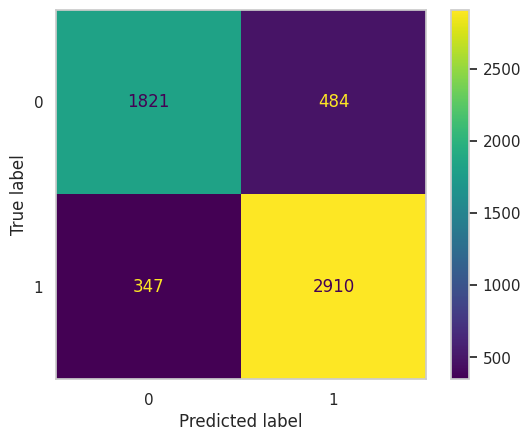

In [38]:
final_xgb = XGBClassifier(n_estimators=100, max_depth=3, random_state=42)
final_xgb.fit(X_train_scaled, y_train)
y_pred_final_xgb = final_xgb.predict(X_test_scaled)

accuracy_final_xgb = accuracy_score(y_test, y_pred_final_xgb)
recall_final_xgb = recall_score(y_test, y_pred_final_xgb)
precision_final_xgb = precision_score(y_test, y_pred_final_xgb)
f1_final_xgb = f1_score(y_test, y_pred_final_xgb)
mcc_final_xgb = matthews_corrcoef(y_test, y_pred_final_xgb)

scores_final_xgb = [accuracy_final_xgb, recall_final_xgb, precision_final_xgb, f1_final_xgb, mcc_final_xgb]

print('\nConfusion Matrix of the XGBoost:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final_xgb)
ax = plt.gca()
ax.grid(False)
plt.show()

## Stacking


Confusion Matrix of the Stacking:



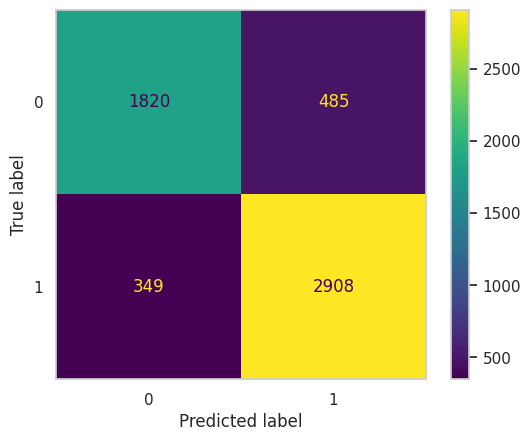

In [39]:
stack = StackingClassifier(estimators=[('dt', final_dt), ('rf', final_rf), ('xgb', final_xgb)], final_estimator=LogisticRegression())
stack.fit(X_train_scaled, y_train)
y_pred_stack = stack.predict(X_test_scaled)

accuracy_stack = accuracy_score(y_test, y_pred_stack)
recall_stack = recall_score(y_test, y_pred_stack)
precision_stack = precision_score(y_test, y_pred_stack)
f1_stack = f1_score(y_test, y_pred_stack)
mcc_stack = matthews_corrcoef(y_test, y_pred_stack)

scores_stack = [accuracy_stack, recall_stack, precision_stack, f1_stack, mcc_stack]

print('\nConfusion Matrix of the Stacking:\n')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_stack)
ax = plt.gca()
ax.grid(False)
plt.show()

# Comparison of Model Performance Metrics

In [40]:
scores = [scores_baseline, scores_final_dt, scores_final_sgd, scores_final_rf, scores_final_xgb, scores_stack]
results_summary = pd.DataFrame(scores, columns=['Accuracy', 'Recall', 'Precision', 'F1-Score', 'MCC'])
results_summary.insert(0, 'Model', ['Baseline', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost', 'Stacking'])
results_summary

,Model,Accuracy,Recall,Precision,F1-Score,MCC
0,Baseline,0.775081,0.809334,0.807103,0.808217,0.536324
1,Decision Tree,0.824883,0.897759,0.820196,0.857227,0.636333
2,Logistic Regression,0.853290,0.895916,0.859499,0.877330,0.695983
3,Random Forest,0.846818,0.889776,0.854615,0.871841,0.682541
4,XGBoost,0.850593,0.893460,0.857395,0.875056,0.690376
5,Stacking,0.850054,0.892846,0.857059,0.874586,0.689260


Logistic Regression achieved the best overall performance across most metrics, including the highest F1-Score (0.877), Precision (0.859), and MCC (0.696), indicating a strong balance between recall and precision. While Random Forest and XGBoost also performed well, they slightly trailed Logistic Regression. All models outperformed the baseline significantly, especially in terms of MCC and F1-Score.